<h1 align="center"> GRADED ASSIGNMENT</h1>

<div>
<td> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

Welcome to the Assignment! 

This notebooks contains two **independent** tasks. You will have to complete both tasks to receive a grade.
- The first task is about a Youtube video dataset.
- The second task is about a financial dataset on credit information of clients

In each part, we will provide you with a set of questions. You will have to answer these questions by writing code in the corresponding cells before ansering the quiz questions on Moodle.
Then, you will have to perform the following two steps:
- Answer the quiz questions on Moodle.
- Submit this notebook on Moodle

Make sure to follow all instructions carefully.

Good luck! 🍀

**Note**: Have your notebook with the answers ready for answering the quiz. 

**Questions**: You can post your questions in Moodle in the dedicated forum. No questions will be answered by email.

When creating a question, please make sure to provide a clear description of your problem and the code you have already tried.

Also in the object  of the message, use the following format: Part X - Question Y.Z where :
- X is the part number,
- Y is the question number
- Z is the sub-question number.

## PART I - DATA CLEANING AND EXPLORATION
First a few preliminary steps to set you up. You can execute the cells below to get you started.

In [286]:
# Import required packages
# You should not need additonal packages for this part but you can import any package you want

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Do not change the following line
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [287]:
pd.read_csv('https://storage.googleapis.com/bia-assignment/youtube.csv')

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.00,2541550.00,4.89,720.00,1280.00,Gaming
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.00,1727646.00,4.95,720.00,1280.00,Gaming
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.00,1402747.00,4.96,720.00,1280.00,Gaming
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.00,4348296.00,4.94,720.00,1280.00,Gaming
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.00,1410659.00,4.96,720.00,1280.00,Gaming
...,...,...,...,...,...,...,...,...,...,...
139502,cutepolish,2010-02-23,Easy Bride Wedding Nails,"['easy', 'makeup', 'beauty', 'fashion']",201.00,284147.00,4.61,480.00,640.00,Howto & Style
139503,cutepolish,2010-02-22,Purple Flower Nails,"['easy', 'makeup', 'beauty', 'fashion', 'tutor...",180.00,136278.00,4.64,480.00,640.00,Howto & Style
139504,cutepolish,2010-02-21,Domo Kun Nails,"['easy', 'makeup', 'beauty', 'fashion']",277.00,228384.00,4.84,480.00,640.00,Howto & Style
139505,cutepolish,2010-02-20,Easy Plaid Nails,"['easy', 'makeup', 'beauty', 'fashion']",174.00,247053.00,4.86,480.00,640.00,Howto & Style


In [288]:
# Load the data
df = pd.read_csv('https://storage.googleapis.com/bia-assignment/youtube.csv')

# Visualise first 3 rows
df.sort_values(by='upload_date', ascending=False).head(3)

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
101598,Hong Giang DIY Slime,2019-10-03,Mixing Random Things into Slime! Relaxing with...,[],730.00,99632.00,4.24,1080.00,1920.00,Howto & Style
107247,Kabita's Kitchen,2019-10-03,डिजिटल समोसा | Noodles Samosa | Chinese Samosa...,[],628.00,65919.00,4.86,1080.00,1920.00,Howto & Style
105473,Grandpa Kitchen,2019-10-03,Grandpa LIVE,[],180.00,722915.00,4.96,1080.00,1920.00,Howto & Style


This Youtube dataset contains informations about multiple videos uploaded on youtube.
- **channel** : the channel id of that has uploaded the video
- **upload_date** : the date when the video has been uploaded on Youtube
- **title** : the title of the video
- **tags** : a list of tags that the author of the video has allocated to its video 
- **duration** : the duration of the video in seconds
- **view_count** : the number of views of a video
- **average_rating** : the average rating of the video when the metadata have been extracted
- **height, width** : the maxinal resolution of the video
- **channel_cat** : the category to which the channel belongs

### Question 1. How many observations (rows) and columns does the dataset contain?
Print the number of rows and colums of the dataset.

In [289]:
# YOUR CODE HERE
nb_rows = df.shape[0]
nb_cols = df.shape[1]
print('Number of rows: ', nb_rows, sep='\t')
print('Number of columns: ', nb_cols, sep='\t')
df.shape

Number of rows: 	139507
Number of columns: 	10


(139507, 10)

Print the number of null values in each column

In [290]:
# YOUR CODE HERE
nv = df.isnull().sum()
print("Number of null values in each column:")
print(nv)


Number of null values in each column:
channel           0
upload_date       0
title             0
tags              0
duration          0
view_count        0
average_rating    0
height            0
width             0
channel_cat       0
dtype: int64


Now please check what are the data types of the different attributes (columns).




In [291]:
# YOUR CODE HERE
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
channel            object
upload_date        object
title              object
tags               object
duration          float64
view_count        float64
average_rating    float64
height            float64
width             float64
channel_cat        object
dtype: object


Change the data type for the following columns: upload_date.
It should now be a date.

**Hint**: make sure that days, month, year are encoded correctly. For this you can check what the date looks like before and after the encoding. 

In [292]:
# YOUR CODE HERE
print('before',df['upload_date'][3],df['upload_date'].dtype)
df['upload_date'] = pd.to_datetime(df['upload_date'])
print('after',df['upload_date'][3],df['upload_date'].dtype)

before 2013-03-03 object
after 2013-03-03 00:00:00 datetime64[ns]


### Question 2. For which order period have these data samples been collected?

#### Question 2.1: What is the upload date of the oldest video ? and of the most recent video ?

In [293]:
# YOUR CODE HERE
min_date = df['upload_date'].min()
max_date = df['upload_date'].max()

print(f"The minimum upload date is {min_date}")
print(f"The maximum upload date is {max_date}")



The minimum upload date is 2005-12-28 00:00:00
The maximum upload date is 2019-10-03 00:00:00


#### Question 2.2: What is the view count of the oldest video? and of the newest video?

In [294]:
# YOUR CODE HERE
oldest_video_view = df.loc[df['upload_date'] == min_date, 'view_count'].values[0] #df[df['upload_date'] == min_date]
print(f"The oldest video has {oldest_video_view} views")

most_recent_video_view = df.loc[df['upload_date'] == max_date, 'view_count'].values[0]
print(f"The most recent video has {most_recent_video_view} views")

The oldest video has 517076.0 views
The most recent video has 99632.0 views


### Question 3. Categories analysis

#### Question 3.1: What are the average view count and total view count per category ("Gaming" and "Howto & Stlye") ?
**Hint**: Use the [`group_by()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function and refer to its documentation for examples on how to use it. The function `group_by()` is used to group the data by a certain column and is then followed by an aggregation function such as `sum()` or `mean()` which will be applied to the grouped data.
For example, to get the average income per country, you can use the following code:
```python
```python
df.groupby('country')['income'].mean()
```

Or if you want to get different statistics for different columns, you can use the following code:
```python
df.groupby('country').agg({'population': 'sum', 'income': ['mean', 'sdt']})
```
This will return a dataframe with the sum of the population and the mean and standard deviation of the average income per country.

In [295]:
# YOUR CODE HERE
average_view_count = df.groupby('channel_cat')['view_count'].mean()
print(average_view_count)
total_view_count = df.groupby('channel_cat')['view_count'].sum()
print(total_view_count)


channel_cat
Gaming          1632725.35
Howto & Style   1538505.55
Name: view_count, dtype: float64
channel_cat
Gaming          135986429274.00
Howto & Style    86493243255.00
Name: view_count, dtype: float64


In [296]:
df.groupby('channel_cat').agg({'view_count':['sum','mean','std']})

view_count                      
                          sum       mean        std
channel_cat                                        
Gaming        135986429274.00 1632725.35 8281294.59
Howto & Style  86493243255.00 1538505.55 6546043.45

#### Question 3.2: On one graph, plot monthly views for each channel category with a lineplot.
**Hint:** You may want to add new columns such as month and year and then do a groupy on these two columns by for the plot. Alternatively, another option is to use the [`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function.

In [297]:
# Add columns for year and month
df['year'] = df['upload_date'].dt.year
df['month'] = df['upload_date'].dt.month
# YOUR CODE HERE
#print(df.dtypes)
df.head()

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,year,month
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.00,2541550.00,4.89,720.00,1280.00,Gaming,2013,3
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.00,1727646.00,4.95,720.00,1280.00,Gaming,2013,3
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.00,1402747.00,4.96,720.00,1280.00,Gaming,2013,3
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.00,4348296.00,4.94,720.00,1280.00,Gaming,2013,3
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.00,1410659.00,4.96,720.00,1280.00,Gaming,2013,3


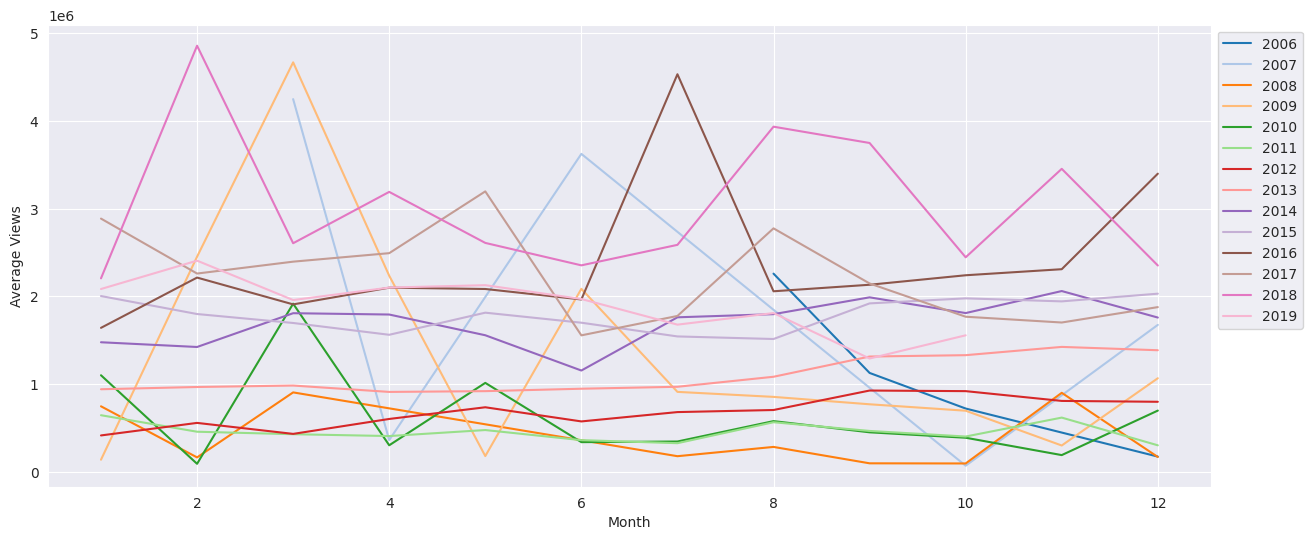

In [298]:
# Create a figure and plot the line chart of average views for the category Gaming
# YOUR CODE HERE
df_gaming = df[df['channel_cat'] == 'Gaming']
avg_month_views_gaming = df_gaming.groupby(['year', 'month'])['view_count'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=avg_month_views_gaming, x='month', y='view_count', hue='year', palette="tab20")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Month')
plt.ylabel('Average Views')
plt.show()

In [299]:
#Q13
year2010 = df[df['year'] == 2010]
cat_views2010 = year2010.groupby('channel_cat')['view_count'].max()
cat_views2010

channel_cat
Gaming          46631630.00
Howto & Style   56126937.00
Name: view_count, dtype: float64

#### Question 3.3: What is the correlation between the average monthly views of each channel category for the year 2012 ?
__Hint :__ You may want to filter data for the year 2012 first, then get monthly average views as a time series for both channels before computing the correlation.

In [300]:
# YOUR CODE HERE
year2012 = df[df['year'] == 2012]
#year2012
avg_2012_views = year2012.groupby(['channel_cat', 'month'])['view_count'].mean()
dfavg_2012_views = avg_2012_views.to_frame().reset_index()
dfavg_2012_views = dfavg_2012_views.pivot_table(index = 'month', columns = 'channel_cat', values='view_count')
#dfavg_2012_views
corr_view_cat = dfavg_2012_views.corr()
corr_view_cat
###voir walktrhough 04

channel_cat,Gaming,Howto & Style
channel_cat,,
Gaming,1.00,0.53
Howto & Style,0.53,1.00


### Question 4. Number of tags and the average rating of the videos

#### Question 4.1: Add a colum to the dataframe that contains the number of tags related to this video

In [301]:
df['tags']

0         ['lets', 'play', 'horror', 'game', 'walkthroug...
1         ['lets', 'play', 'horror', 'game', 'walkthroug...
2         ['lets', 'play', 'horror', 'game', 'walkthroug...
3         ['lets', 'play', 'horror', 'game', 'walkthroug...
4         ['lets', 'play', 'horror', 'game', 'walkthroug...
                                ...                        
139502              ['easy', 'makeup', 'beauty', 'fashion']
139503    ['easy', 'makeup', 'beauty', 'fashion', 'tutor...
139504              ['easy', 'makeup', 'beauty', 'fashion']
139505              ['easy', 'makeup', 'beauty', 'fashion']
139506                      ['makeup', 'beauty', 'fashion']
Name: tags, Length: 139507, dtype: object

In [302]:
# YOUR CODE HERE
#Question 4.1 and 4.2: when there are no tags, an empty list [] appears in the column tags. 
#You have to count this empty list as 0 tags. Otherwise, it affects the measure of your correlation.
df
nb_tags = []
for x in df['tags']:
  if x == '[]':
    nb_tags.append(0)
  else:
    nb_tags.append(len(x.split(',')))

#attention aux vidéos sans tags 
df['nb_tags'] = nb_tags
df

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,year,month,nb_tags
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.00,2541550.00,4.89,720.00,1280.00,Gaming,2013,3,11
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.00,1727646.00,4.95,720.00,1280.00,Gaming,2013,3,11
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.00,1402747.00,4.96,720.00,1280.00,Gaming,2013,3,11
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.00,4348296.00,4.94,720.00,1280.00,Gaming,2013,3,11
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.00,1410659.00,4.96,720.00,1280.00,Gaming,2013,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139502,cutepolish,2010-02-23,Easy Bride Wedding Nails,"['easy', 'makeup', 'beauty', 'fashion']",201.00,284147.00,4.61,480.00,640.00,Howto & Style,2010,2,4
139503,cutepolish,2010-02-22,Purple Flower Nails,"['easy', 'makeup', 'beauty', 'fashion', 'tutor...",180.00,136278.00,4.64,480.00,640.00,Howto & Style,2010,2,5
139504,cutepolish,2010-02-21,Domo Kun Nails,"['easy', 'makeup', 'beauty', 'fashion']",277.00,228384.00,4.84,480.00,640.00,Howto & Style,2010,2,4
139505,cutepolish,2010-02-20,Easy Plaid Nails,"['easy', 'makeup', 'beauty', 'fashion']",174.00,247053.00,4.86,480.00,640.00,Howto & Style,2010,2,4


#### Question 4.2: Compute the correlation between the number of tags and the average rating of videos

In [303]:
# YOUR CODE HERE
corr_nbtags_rating = df['nb_tags'].corr(df['average_rating'])
corr_nbtags_rating
print(round(corr_nbtags_rating,2))

0.11


#### Question 4.3: Compute the correlation between the length of the title and the average rating of videos

In [304]:
# YOUR CODE HERE
df['title_len'] = df['title'].apply(len)
corr_titlelen_avgrating = df['title_len'].corr(df['average_rating'])
corr_titlelen_avgrating
print(round(corr_titlelen_avgrating,2))

-0.06


### Question 5. Average duration of videos

#### Question 5.1: Compute the average duration of videos each year.

In [305]:
# Compute the average duration of videos each year.
avg_year_duration = df.groupby(['year', 'channel_cat'])['duration'].mean().reset_index()
avg_year_duration


,year,channel_cat,duration
0,2005,Howto & Style,230.00
1,2006,Gaming,85.57
2,2007,Gaming,75.40
3,2007,Howto & Style,237.34
4,2008,Gaming,125.13
5,2008,Howto & Style,161.12
6,2009,Gaming,215.44
7,2009,Howto & Style,280.19
8,2010,Gaming,467.62
9,2010,Howto & Style,338.35


#### Question 5.2: Plot the average duration of video per year for both categories on the same plot.

<Axes: xlabel='year', ylabel='duration'>

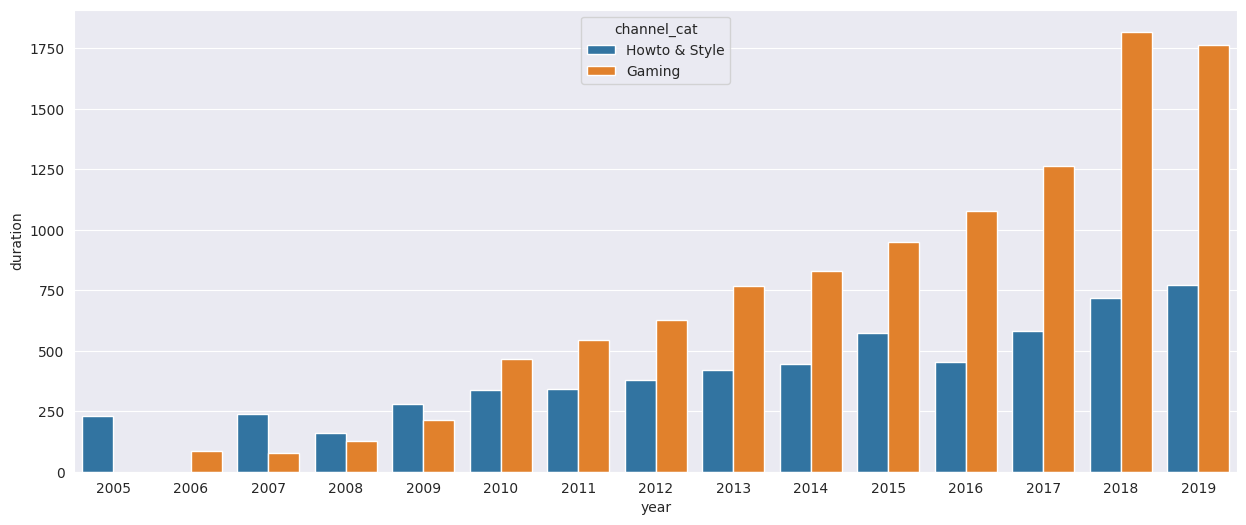

In [306]:
# YOUR CODE HERE
plt.figure(figsize=(15, 6))
sns.barplot(x = 'year', y ='duration', hue = 'channel_cat',data = avg_year_duration)

<Axes: xlabel='year', ylabel='duration'>

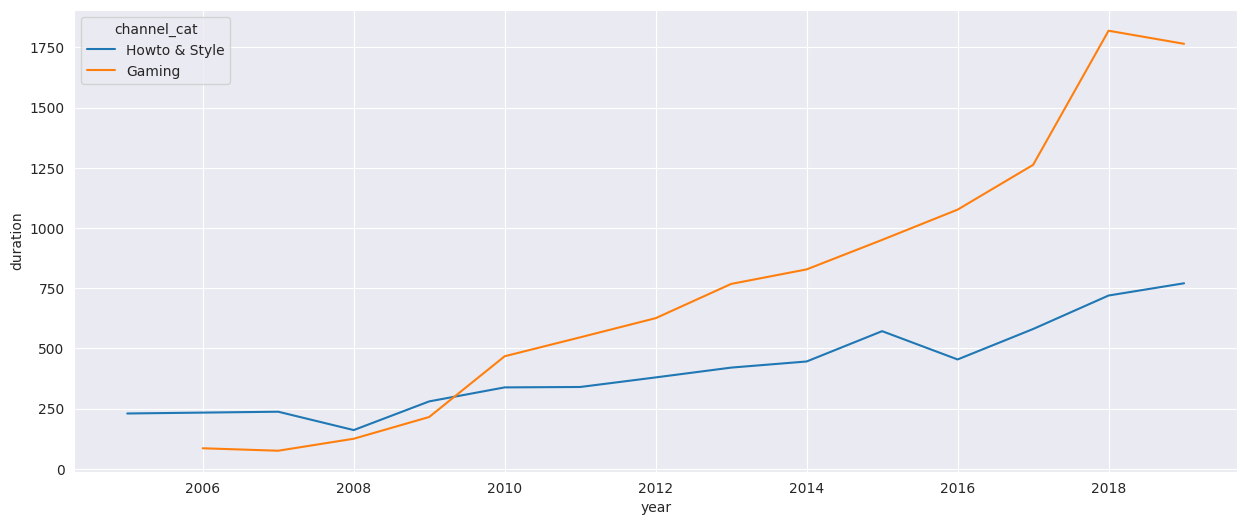

In [307]:
plt.figure(figsize=(15, 6))
sns.lineplot(x = 'year', y ='duration', hue = 'channel_cat',data = avg_year_duration)

## PART II - CLASSIFICATION
For the second part, we will use a bank related dataset.   
The dataset contains information on a company's employees such as:

* customer ID
* customer age
* gender
* education level
* marital status
* income category
* credit limit
* ...


In [308]:
# All necessary imports
# You should not need additonal packages for this part but you can import any package you want

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Do not change the following line
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Load the data

Load the dataset in a dataframe called `df` and visualise the first 5 rows.

In [309]:
# Load the data
df = pd.read_csv('https://storage.googleapis.com/bia-assignment/bank_data.csv')

df

,CustomerID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CustomerID.1
0,77893100,49,M,2,High School,Single,$120K +,42,3,2,4,21143.99,1190,19954.01,0.50,4895,66,0.78,0.06,77890485
1,77906340,42,F,4,Graduate,Single,Less than $40K,34,3,2,3,1853.01,0,1852.99,0.85,4544,72,0.54,-0.00,77890486
2,77896672,53,F,5,Graduate,Single,$40K - $60K,41,2,1,3,9815.01,1699,8116.01,0.63,7962,89,0.57,0.18,77890487
3,77907011,63,F,0,High School,Married,Less than $40K,53,5,3,2,2270.99,1278,992.99,0.37,1550,33,0.67,0.53,77890488
4,77899573,51,M,1,Unknown,Single,$60K - $80K,22,2,3,3,4248.01,1177,3071.02,0.83,13958,116,0.78,0.29,77890489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21361,77904816,56,F,5,Graduate,Married,Less than $40K,36,5,4,4,3088.01,2517,571.00,0.85,2292,54,0.87,0.82,77911846
21362,77893743,50,M,1,Graduate,Married,$120K +,43,4,5,3,20957.98,0,20957.99,0.78,4425,78,0.69,0.01,77911847
21363,77896451,46,M,4,Uneducated,Married,$40K - $60K,35,3,2,2,9149.00,1566,7582.99,0.97,1790,60,0.78,0.18,77911848
21364,77892298,53,M,4,Unknown,Single,$120K +,48,3,3,4,34516.02,278,34238.01,0.82,3029,49,0.41,0.01,77911849


### Question 1: Data Exploration

#### Question 1.1 Create an historgam of the Education_Level column to get a sense of the data distribution for this column. What is the most common education level of the customers?

<Axes: xlabel='Education_Level', ylabel='count'>

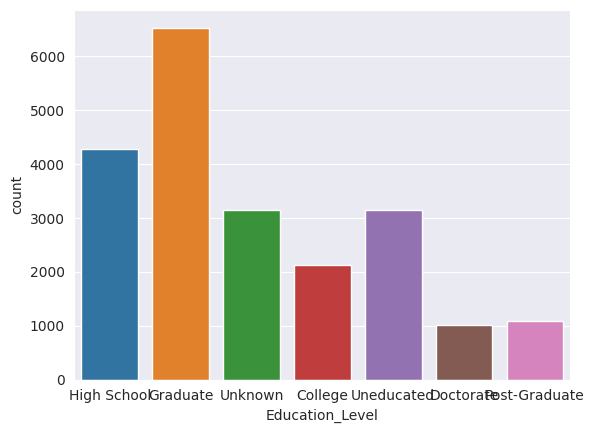

In [310]:
# YOUR CODE HERE
sns.countplot(x='Education_Level', data=df)

In [311]:
df[df['Education_Level']=='High School'].count()

CustomerID                  4286
Customer_Age                4286
Gender                      4286
Dependent_count             4286
Education_Level             4286
Marital_Status              4286
Income_Category             4286
Months_on_book              4286
Total_Relationship_Count    4286
Months_Inactive_12_mon      4286
Contacts_Count_12_mon       4286
Credit_Limit                4286
Total_Revolving_Bal         4286
Avg_Open_To_Buy             4286
Total_Amt_Chng_Q4_Q1        4286
Total_Trans_Amt             4286
Total_Trans_Ct              4286
Total_Ct_Chng_Q4_Q1         4286
Avg_Utilization_Ratio       4286
CustomerID.1                4286
dtype: int64

#### Question 1.2 What is the age distribution of the people from the dataset ? Plot its distribution.
__Hint :__ Plot histogram from the _Customer_Age_ feature.

<Axes: xlabel='Customer_Age', ylabel='Count'>

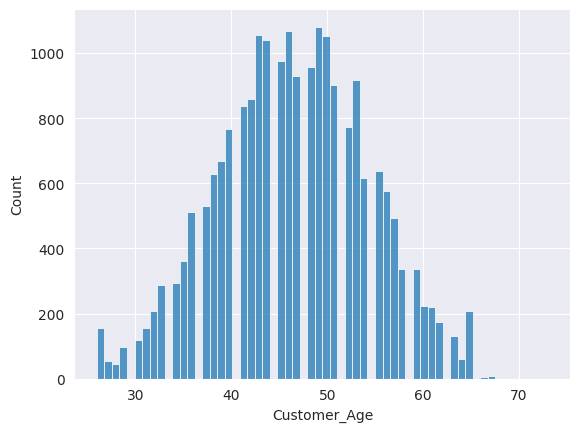

In [312]:
# YOUR CODE HERE
sns.histplot(x='Customer_Age', data=df )

#### Question 1.3 Does the data distribution for the Customer_Age column look to follow a normal distribution? Compute the mean, standard deviation, skewness and kurtosis of the distribution.
__Hint :__ You may want to use the [`skew()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) function from the scipy library. For the kurtosis, you can use the [`kurtosis()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) function. <br>
If you want to test the normality of the distribution, you can use tjhe ktest function from the scipy library. For example, to test if the distribution of the Customer_Age column is normal, you can use the following code:
```python
from scipy.stats import kstest
kstest(df['column_tot_test'], 'norm')
```
Another alternative is to use jarque_bera test from the statsmodels library. You can refer to the documentation for more information on how to use it on the following link: https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html

The skewness and kurtosis of a normal distribution are respectively 0 and 3. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed. A negative skewness indicates that the tail on the left side of the distribution is longer or fatter. A positive skewness indicates that the tail on the right side is longer or fatter. The kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

In [313]:
# YOUR CODE HERE
from scipy.stats import kstest
mean_age = df['Customer_Age'].mean()
std_age = df['Customer_Age'].std()
skewness_age = df['Customer_Age'].skew()
kurtosis_age = df['Customer_Age'].kurt()


print(f'Mean: {mean_age}')
print(f'Standard Deviation: {std_age}')
print(f'Skewness: {skewness_age}')
print(f'Kurtosis: {kurtosis_age}')

kstest(df['Customer_Age'], 'norm')
standardized_age = (df['Customer_Age'] - mean_age) / std_age
ks_statistic, p_value = kstest(standardized_age, 'norm')

print(f'KS Statistic: {ks_statistic}')
print(f'P-value: {p_value}')

if p_value > 0.05:
    print('follows a normal distribution.')
else:
    print('do not follow a normal distribution.')

Mean: 46.46480389403725
Standard Deviation: 7.871644753904913
Skewness: -0.05107088330953977
Kurtosis: -0.2979426282845288
KS Statistic: 0.03620257280328987
P-value: 9.135858374273402e-25
do not follow a normal distribution.


### Question 2. Convert categrocial columns to numerical
At this point, we will change some of the values in the dataset in order be able to work with these features. <br>
Indeed a clustering algorithm is based on distances between the data points. Therefore, we need to have numeric values instead of categorical variables.<br>

For this reason, we will perform the following mapping:
- We will map `Men` to 0 and `Female` to 1 of the column `Gender`
- We will also convert the `Income_Category` to a numeric value, where we will assume that the higher the income, the more likely the customer is to have a credit card. You should do the following mapping:

| Categorical Value (to be replaced)     | Numerical Value (new value to overwrite the categorical variable)     |
| -----------       | -----------   |
| 'Unknown'         |  -1           | 
| '$120K +'         |  120          | 
| '$80K - $120K'    |  80           | 
| '$60K - $80K'     | 60            |
| '$40K - $60K'     | 40            |
| 'Less than $40K'  | 0             | 

- We will also convert the `Education_Level` to a numeric value, where we will assume that the higher the education level, the more likely the customer is to have a credit card. Here again, you should respect the following convention:

| Categorical Value (to be replaced)     | Numerical Value (new value to overwrite the categorical variable)     |
| -----------       | -----------   |
| 'Unknown'         |  -1           | 
| 'Uneducated'      |   1           | 
| 'High School'     |  2            | 
| 'College'         | 3             |
| 'Graduate'        | 4             |
| 'Post-Graduate'   | 5             | 
| 'Doctorate'       | 6             | 

**Hint :** You may want to use the [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function applied to a column of a dataframe.

In [314]:
# Convert categorical variables to numerical variables
gender_mapping = {'M': 0, 'F': 1}
df['Gender'] = df['Gender'].map(gender_mapping)
income_map = {
    'Unknown': -1,
    '$120K +': 120,
    '$80K - $120K': 80,
    '$60K - $80K': 60,
    '$40K - $60K': 40,
    'Less than $40K': 0}

education_map = {
    'Unknown': -1,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6}

df['Education_Level'] = df['Education_Level'].map(education_map)
df['Income_Category'] = df['Income_Category'].map(income_map)

df.head()
df.dtypes

CustomerID                    int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status               object
Income_Category               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
CustomerID.1                  int64
dtype: object

In [315]:
# Here we drop all rows with missing values
df[['Customer_Age' , 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']].dropna(axis=0, how='any')
# We can see that there are no missing values in the columns we are interested in as the number of rows is the same as before
print(df.dtypes)
df

CustomerID                    int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status               object
Income_Category               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
CustomerID.1                  int64
dtype: object


,CustomerID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CustomerID.1
0,77893100,49,0,2,2,Single,120,42,3,2,4,21143.99,1190,19954.01,0.50,4895,66,0.78,0.06,77890485
1,77906340,42,1,4,4,Single,0,34,3,2,3,1853.01,0,1852.99,0.85,4544,72,0.54,-0.00,77890486
2,77896672,53,1,5,4,Single,40,41,2,1,3,9815.01,1699,8116.01,0.63,7962,89,0.57,0.18,77890487
3,77907011,63,1,0,2,Married,0,53,5,3,2,2270.99,1278,992.99,0.37,1550,33,0.67,0.53,77890488
4,77899573,51,0,1,-1,Single,60,22,2,3,3,4248.01,1177,3071.02,0.83,13958,116,0.78,0.29,77890489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21361,77904816,56,1,5,4,Married,0,36,5,4,4,3088.01,2517,571.00,0.85,2292,54,0.87,0.82,77911846
21362,77893743,50,0,1,4,Married,120,43,4,5,3,20957.98,0,20957.99,0.78,4425,78,0.69,0.01,77911847
21363,77896451,46,0,4,1,Married,40,35,3,2,2,9149.00,1566,7582.99,0.97,1790,60,0.78,0.18,77911848
21364,77892298,53,0,4,-1,Single,120,48,3,3,4,34516.02,278,34238.01,0.82,3029,49,0.41,0.01,77911849


In [316]:
# Keep only numerical columns of the dataframe
# These columns are the ones we are interested in as they can be used to cluster the customers

df_num = df.select_dtypes(include=np.number)
print(df_num.dtypes)
df_num.head()

CustomerID                    int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Income_Category               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
CustomerID.1                  int64
dtype: object


,CustomerID,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CustomerID.1
0,77893100,49,0,2,2,120,42,3,2,4,21143.99,1190,19954.01,0.50,4895,66,0.78,0.06,77890485
1,77906340,42,1,4,4,0,34,3,2,3,1853.01,0,1852.99,0.85,4544,72,0.54,-0.00,77890486
2,77896672,53,1,5,4,40,41,2,1,3,9815.01,1699,8116.01,0.63,7962,89,0.57,0.18,77890487
3,77907011,63,1,0,2,0,53,5,3,2,2270.99,1278,992.99,0.37,1550,33,0.67,0.53,77890488
4,77899573,51,0,1,-1,60,22,2,3,3,4248.01,1177,3071.02,0.83,13958,116,0.78,0.29,77890489


### Question 3. Use the elbow method to find the optimal number of clusters for following feartures: _Customer_Age, Gender, Income_Category, Education_Level, Credit_Limit_
#### Question 3.1 : What is the inertia for 3 and 4 clusters ? (rounded to the nearest integer)
Refer to the lab 5 for any help about the methodology. <br>
__Hint:__ You should test between 2 to 10 clusters. Also, when you call the `KMeans` function, you should set the `random_state` paramter to 111 and the `n_init` to 50. This will ensure that the results are reproducible.

In [317]:
X_5D = df_num[['Customer_Age', 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']].values

algorithm_3 = KMeans(n_clusters=3, random_state= 111, n_init = 50)
algorithm_3.fit(X_5D)
inertiafor3 = algorithm_3.inertia_

algorithm_4 = KMeans(n_clusters=4, random_state= 111, n_init = 50)
algorithm_4.fit(X_5D)
inertiafor4 = algorithm_4.inertia_

print(f"Inertia for 3 clusters: {round(inertiafor3)}")
print(f"Inertia for 4 clusters: {round(inertiafor4)}")


Inertia for 3 clusters: 189440263472
Inertia for 4 clusters: 95572414216


In [318]:
# YOU CODE HERE
X_5D = df_num[['Customer_Age', 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']].values
inertiafor3 = []
NB_ITER = 10
for n in range(2, NB_ITER):
  algorithm = KMeans(n_clusters=3, random_state= 111, n_init = 50)
  algorithm.fit(X_5D)
  inertiafor3.append(algorithm.inertia_)

inertiafor4 = []
NB_ITER = 10
for n in range(2, NB_ITER):
  algorithm = KMeans(n_clusters=4, random_state= 111, n_init = 50)
  algorithm.fit(X_5D)
  inertiafor4.append(algorithm.inertia_)

print(f"Inertia for 3 clusters: {round(inertiafor3[0])}")
print(f"Inertia for 4 clusters: {round(inertiafor4[0])}")

Inertia for 3 clusters: 189440263472
Inertia for 4 clusters: 95572414216


### Question 4. Use the elbow method to find the optimal number of clusters for following features: _Income_Category, Education_Level, Months_on_book_
#### Question 4.1 : What is the optimal number of cluster for this sub dataset ?
Refer to the lab 5 for any help about the methodology. <br>
__Hint:__ You should test between 2 to 10 clusters. Also, when you call the `KMeans` function, you should set the `random_state` paramter to 111 and the `n_init` to 50. This will ensure that the results are reproducible.

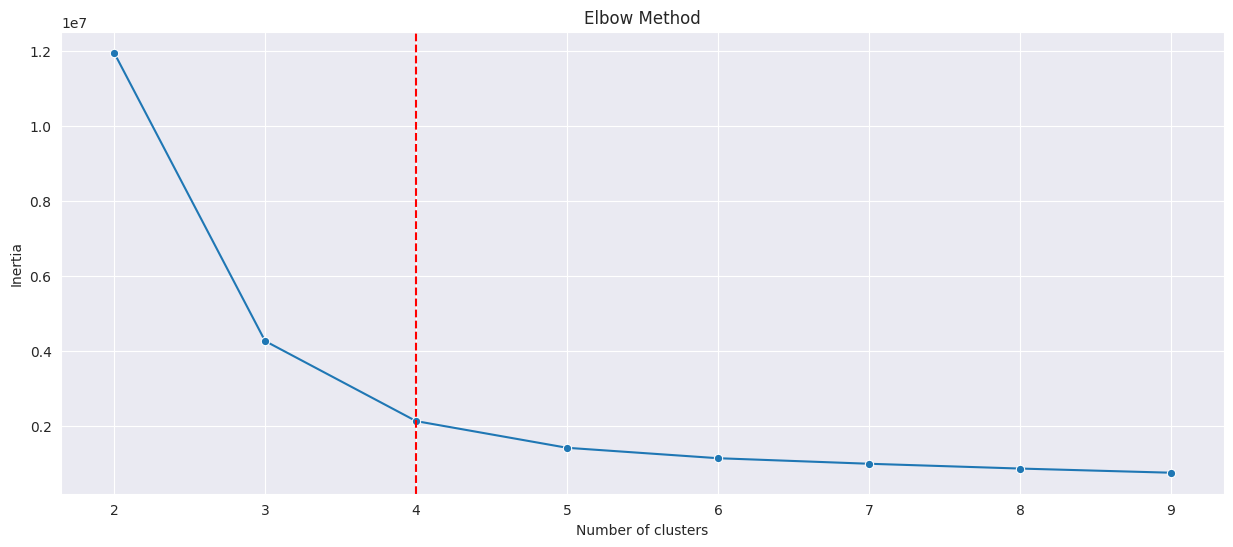

In [319]:
# YOU CODE HERE
X_3D = df_num[['Income_Category', 'Education_Level', 'Months_on_book']].values

inertia = []
NB_ITER = 10
for n in range(2, NB_ITER):
  algorithm = KMeans(n_clusters=n, random_state= 111, n_init = 50)
  algorithm.fit(X_3D)
  inertia.append(algorithm.inertia_)

plt.figure(figsize=(15,6))
sns.lineplot(x=np.arange(2, NB_ITER), y=inertia, sort = False, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters'), plt.ylabel('Inertia')
plt.axvline(x=4, color='r', linestyle='--')
plt.show()


#### Question 4.2 : What is the cluster assignment (cluster ID - varying between 0 and the optimal number found previously) for a person with an income of 120K, a post-graduate degree and 36 months on book?

In [320]:
# YOUR CODE HERE
algorithm = KMeans(n_clusters=4, random_state=111, n_init=50)
algorithm.fit(X_3D)
person = np.array([[120, 5, 36]])
result = algorithm.predict(person)
print(f"Cluster assignment for the person: {result}")
#Q28
algorithmfor3 = KMeans(n_clusters=3, random_state=111, n_init=50)
algorithmfor3.fit(X_3D)
resultfor3 = algorithm.predict(person)
print(f"Cluster assignment for the person: {resultfor3}")



Cluster assignment for the person: [0]
Cluster assignment for the person: [0]


#### Question 4.3 : Get the cluster centroid for the person described above.
The get the centroid of a cluster, you can use the [`cluster_centers_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) attribute of the KMeans object.

In [321]:
# YOUR CODE HERE
cluster_number = result[0]
centroid = algorithm.cluster_centers_[cluster_number]
print(centroid)
cluster_number = resultfor3[0]
centroidfor3 = algorithmfor3.cluster_centers_[cluster_number]
print(centroidfor3)


[120.           2.33726481  36.85285032]
[120.           2.33726481  36.85285032]
